In [73]:
import pandas as pd

In [74]:
data = pd.read_csv("creditcardcsvpresent.csv")   #sample dataset from Kaggle
data.head(100)

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,NaN,100.000000,3000.000000,N,5,Y,Y,0,0.0,0,Y
1,3160040998,NaN,100.000000,4300.000000,N,5,Y,Y,0,0.0,0,Y
2,3160041896,NaN,185.500000,4823.000000,Y,5,N,N,0,0.0,0,Y
3,3160141996,NaN,185.500000,5008.500000,Y,8,N,N,0,0.0,0,Y
4,3160241992,NaN,500.000000,26000.000000,N,0,Y,Y,800,677.2,6,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
95,4138506573,NaN,787.737961,32297.256390,N,3,Y,Y,0,0.0,0,Y
96,4139060865,NaN,263.412790,9746.273241,N,0,Y,N,739,182.0,8,Y
97,4139280493,NaN,921.063930,46974.260420,N,8,Y,Y,0,0.0,0,Y
98,4151187710,NaN,733.491177,35941.067690,N,0,Y,Y,0,0.0,0,Y


In [75]:
pd.options.display.max_columns = None

In [76]:
data=data.drop(columns=['Merchant_id', 'Transaction date'])

In [77]:
data.isnull().sum()

Average Amount/transaction/day    0
Transaction_amount                0
Is declined                       0
Total Number of declines/day      0
isForeignTransaction              0
isHighRiskCountry                 0
Daily_chargeback_avg_amt          0
6_month_avg_chbk_amt              0
6-month_chbk_freq                 0
isFradulent                       0
dtype: int64

In [78]:
data.duplicated().any()

True

In [79]:
data = data.drop_duplicates()

In [80]:
data = data.replace(['N'], 0)
data= data.replace(['Y'], 1)

In [81]:
X = data.drop('isFradulent',axis=1)
y = data['isFradulent']

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

In [83]:
normal = data[data['isFradulent']==0]
fraud = data[data['isFradulent']==1]

In [84]:
fraud.shape

(448, 10)

In [85]:
normal_sample=normal.sample(n=448)
normal_sample.shape

(448, 10)

In [86]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)

In [87]:
X = new_data.drop('isFradulent',axis=1)
y = new_data['isFradulent']

In [88]:
!pip install diffprivlib

In [89]:
import random
from diffprivlib.mechanisms import Exponential

exp_dataset = data.copy()
sensitivity = 3
epsilon = 0.3
utility = [random.randint(0,1) for x in range(len(exp_dataset['Transaction_amount']))]
candidates = exp_dataset['Transaction_amount'].values.tolist()

mechanism = Exponential(
    sensitivity=sensitivity,
    epsilon=epsilon,
    utility=utility,
    candidates=candidates
)

exp_dataset['Transaction_amount'] = [mechanism.randomise() for _ in range(len(exp_dataset['Transaction_amount']))]
exp_dataset.head(10)                #Dataset formed through Exponential module

,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,100.0,7773.636132,0,5,1,1,0,0.0,0,1
1,100.0,33170.202850,0,5,1,1,0,0.0,0,1
2,185.5,39554.877530,1,5,0,0,0,0.0,0,1
3,185.5,956.809864,1,8,0,0,0,0.0,0,1
4,500.0,6421.016503,0,0,1,1,800,677.2,6,1
5,500.0,13219.015420,0,0,1,1,800,677.2,6,1
6,262.5,22817.081520,0,0,0,0,900,345.5,7,1
7,185.5,1945.788791,1,20,0,0,0,0.0,0,1
8,185.5,20634.845980,1,20,0,0,0,0.0,0,1
9,185.5,26500.000000,1,20,0,0,0,0.0,0,1


In [90]:
df_graph=pd.concat([data['Transaction_amount'], exp_dataset['Transaction_amount']],axis=1, keys=['Original_df','expo_dataset'])   #Comparing age col from both datasets
df_graph.head(10)
df1=df_graph.head(50)

<AxesSubplot:>

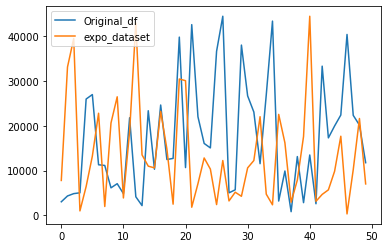

In [91]:
df1.plot.line()  #Comparing original amt to new amt

In [92]:
import numpy as np

In [93]:
# Read training and test data
import os
processed_data_dir = 'data'
X_train_path = os.path.join(processed_data_dir, 'X_train.csv')
y_train_path = os.path.join(processed_data_dir, 'y_train.csv')
X_test_path = os.path.join(processed_data_dir, 'X_test.csv')
y_test_path = os.path.join(processed_data_dir, 'y_test.csv')

#Imporing files for ml training
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv")

In [94]:
# Create a results dataframe to store and later compare results
results = pd.DataFrame()
results['Metrics'] = ['True Negatives', 'False Negatives', 'False Positives', 'True Positives', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Support']

def get_metrics(labels, pred_labels):
    conf_matrix = np.asarray(confusion_matrix(labels, pred_labels))
    metrics = np.concatenate(([accuracy_score(labels, pred_labels)], precision_recall_fscore_support(labels, pred_labels, average='binary')))
    return np.concatenate((conf_matrix.reshape(-1),metrics))

def fit_model(input_data, model_fn, model_args=None, threshold=None, labels=None):
    return model_fn(input_data, model_args, threshold, labels)

def predict_model(input_data, model, predict_fn, threshold=None):
    return predict_fn(input_data, model, threshold)

In [95]:
from sklearn.ensemble import IsolationForest

In [96]:
def fit_isolation_forest(input_data, args=None, threshold=None, labels=None):
    if threshold == None:
        model = IsolationForest()
    else:
        model = IsolationForest(contamination=threshold)
    
    model.fit(input_data)

    return model

def predict_isolation_forest(input_data, model, threshold=None):
    y_pred = model.predict(input_data)
    y_pred = [1 if pred == -1 else 0 for pred in y_pred]

    return y_pred

In [97]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support, mean_squared_error, recall_score

In [98]:
if_model = fit_model(X_train, fit_isolation_forest, None)

y_pred_test = predict_model(X_test, if_model, predict_isolation_forest)
print('CONFUSION MATRIX:\n', confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))

CONFUSION MATRIX:
 [[495  30]
 [  6  84]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96       525
           1       0.74      0.93      0.82        90

    accuracy                           0.94       615
   macro avg       0.86      0.94      0.89       615
weighted avg       0.95      0.94      0.94       615



In [99]:
import joblib
rf1=IsolationForest

In [100]:
joblib.dump(rf1,"credit_card_model")

['credit_card_model']

In [101]:
model = joblib.load("credit_card_model")

In [102]:
regressor = IsolationForest()  # <-- you need to instantiate the regressor like so 
regressor.fit(X_train, y_train)

IsolationForest()

In [103]:
pred = regressor.predict([[1,1,1,1,1,1,1,1,1]])

In [104]:
if pred == 1:
    print("Normal Transcation")
elif pred==-1:
    print("Fraudulent Transcation")
print(pred)

Fraudulent Transcation
[-1]


In [105]:
data= data.rename(columns={"Transaction date": "Transdate", "Average Amount/transaction/day": "AvgAmt", "Is declined": "Isdeclined", "Total Number of declines/day": "NoOfDeclines","6_month_avg_chbk_amt": "month_avg_chbk_amt","6-month_chbk_freq":"month_chbk_freq "})

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3074 entries, 0 to 3074
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AvgAmt                    3074 non-null   float64
 1   Transaction_amount        3074 non-null   float64
 2   Isdeclined                3074 non-null   int64  
 3   NoOfDeclines              3074 non-null   int64  
 4   isForeignTransaction      3074 non-null   int64  
 5   isHighRiskCountry         3074 non-null   int64  
 6   Daily_chargeback_avg_amt  3074 non-null   int64  
 7   month_avg_chbk_amt        3074 non-null   float64
 8   month_chbk_freq           3074 non-null   int64  
 9   isFradulent               3074 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 264.2 KB


In [107]:
data.head(4)

,AvgAmt,Transaction_amount,Isdeclined,NoOfDeclines,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,month_avg_chbk_amt,month_chbk_freq,isFradulent
0,100.0,3000.0,0,5,1,1,0,0.0,0,1
1,100.0,4300.0,0,5,1,1,0,0.0,0,1
2,185.5,4823.0,1,5,0,0,0,0.0,0,1
3,185.5,5008.5,1,8,0,0,0,0.0,0,1


In [ ]:
from tkinter import *
import joblib

def show_entry_fields():
    
    
    AvgAmt= float(e3.get())
    Transaction_amount=float(e4.get())
    Isdeclined =int(e5.get())
    NoOfDeclines=int(e6.get())

    isForeignTransaction =int(e7.get())
    isHighRiskCountry=int(e8.get())
    Daily_chargeback_avg_amt=int(e9.get())
    month_avg_chbk_amt=float(e10.get())
    month_chbk_freq=int(e11.get())
    #isFradulent =object(e12.get())




    model = joblib.load('credit_card_model')
    y_pred = regressor.predict([[AvgAmt,Transaction_amount,Isdeclined,NoOfDeclines,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,month_avg_chbk_amt,month_chbk_freq]])
                                
    list1=[AvgAmt,Transaction_amount,Isdeclined,NoOfDeclines,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,month_avg_chbk_amt,month_chbk_freq]

    result = []
    if y_pred ==1:

        result.append("Normal Transcation")
    else:

        result.append("Fraudulent Transcation")
    print("######################################")
    print("Credit Card Fraud Detection System", result)
    print("######################################")



    Label(master, text="Final Prediction from the model - credit card fraud detection").grid(row=31)
    Label(master, text=result).grid(row=32)



master = Tk()
master.title("Credit Card Fraud Detection System")


label = Label(master, text = "Credit Card Fraud Detection System"
                          , bg = "black", fg = "white",width = 30).grid(row=0,columnspan=2)



Label(master, text="Enter value of AvgAmt").grid(row=3)
Label(master, text="Enter value of Transaction_amount").grid(row=4)
Label(master, text="Enter value of Isdeclined").grid(row=5)
Label(master, text="Enter value of NoOfDeclines").grid(row=6)

Label(master, text="Enter value of isForeignTransaction").grid(row=7)
Label(master, text="Enter value of isHighRiskCountry").grid(row=8)
Label(master, text="Enter value of Daily_chargeback_avg_amt").grid(row=9)
Label(master, text="Enter value of month_avg_chbk_amt").grid(row=10)
Label(master, text="Enter value of month_chbk_freq").grid(row=11)



e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)

e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)



e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)

e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)

 
Button(master, text='Predict', command=show_entry_fields).grid(row=20, column=1, sticky=W, pady=4)

mainloop( )

######################################
Credit Card Fraud Detection System ['Normal Transcation']
######################################
